# Tópico 1 - Dados, Informação e Conhecimento

Professor Henrique Ferreira e Professor Vinicius Holanda, 2023

Neste Jupyter iremos carregar diferentes arquivos em diferentes formatos e representar informação de diferentes maneiras.

A ideia é compreender como o computador armazenada dados, o que são codecs e encodings, o que é uma Estrutura de Dados, e como podemos utilizar esses conceitos para representar Informação e Conhecimento.

Usaremos a linguagem de programação Python para fazer isso.

Lembre-se que as variáveis em python são implícitas, não necessitando declarar o seu tipo:

*   String - `str`: Conjunto de caracteres, por exemplo: `[Nome]`
*   Inteiro - `int`: Valor inteiro (sem casas decimais), por exemplo: `[Dia do mês]`
*   Float - `float`: Valor com casas decimais, por exemplo : `[Altura de uma pessoa]`
*   Boleana - `bool`: Valor lógico (0 ou 1; False ou True), por exemplo: `[Peça presente ou ausente]`

Entretanto, na maioria das vezes usamos variáveis que são de tipos mais complexos (objetos/classes). É muito importante quando trabalhamos de maneira mais avançada com qualquer linguagem de programação saber o tipo de variável. Isso facilita o acesso a propriedades da variável (atributos do objeto) e a métodos implementados para aquelas classes.

Além do tipo de variável embutido na linguagem de programação, podemos abstrair diferentes representações para as informações do nosso problema. Essas abstrações serão uteis quando falarmos de métodos de IA específicos cuja entrada de dados deve estar preparada em uma representação adequada para o funcionamento de cada algoritmo.

In [1]:
!rm -rf fiap-graduacao-iachatbot/

In [2]:
!git clone https://github.com/FIAPON/fiap-graduacao-iachatbot.git

Cloning into 'fiap-graduacao-iachatbot'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 70 (delta 18), reused 59 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 19.59 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [3]:
%cd fiap-graduacao-iachatbot/

/content/fiap-graduacao-iachatbot


--------------------------------
## Exemplo 1 - Entendendo o que é um arquivo de texto

O comando **open** é usado para abrir arquivos. O **with** é usado para garantir finalização do arquivo depois de aberto de maneira segura.

Quando um arquivo é aberto, ele pode ser aberto para leitura ('r'), escrita ('w'), acrescentar ('a') ou ler como binário ('rb').

Mais informações em https://docs.python.org/3/library/io.html

In [4]:
utf_text = open("dados" + "/texto_utf8.txt", "r", encoding="utf-8") # O modo "r" de leitura e o encoding UTF-8 são padrões do comando open
utf_text.readlines()

['Este é um arquivo de texto condificado em ansi. \n',
 'Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨\n',
 'A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.\n',
 'Nova Linha\n',
 '\n',
 '\n',
 '\n',
 'Outra NOva Linha\n',
 '\n',
 '\n',
 '\n',
 'Outra NOva Linha 1000']

In [5]:
ansi_text = open("dados" + "/texto_ansi.txt", "r", encoding="CP1252") # Aqui utilizamos o encoding CP1252 padrão Windows.
ansi_text.readlines()                                                     # Mas também podemos utilizar o padrão ISO-8859-1

['Este é um arquivo de texto condificado em ansi. \n',
 'Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨\n',
 'A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.\n',
 '/nInserindo mais uma linha!!!/t Inserindo /t mais uma linha!!!']

Perceba que o objto TextIOWrapper tem um atributo encoding que codifica os carateres do tipo cp1252 presentes na string de texto. Este encoding é referente ao alfabeto Latino em sistemas Windows (https://en.wikipedia.org/wiki/Windows-1252).

# ATTENZIONE!!! Nas células acima utilizamos o comando open() de uma forma que exige uma cautela maior.


In [7]:
with open("dados/" + "texto_ansi.txt", "r", encoding="ISO-8859-1") as ansi_file:
    print(ansi_file)                      # Printando o que foi carregado na variável file ao abrir o arquivo
    print(type(ansi_file))                # Printando o tipo de dado (estrutura) da variavel file
    ansi_lines = ansi_file.readlines()    # Readlines é um método da classe _io.TextIOWrapper que lê as linhas do arquivo

ansi_lines

<_io.TextIOWrapper name='dados/texto_ansi.txt' mode='r' encoding='ISO-8859-1'>
<class '_io.TextIOWrapper'>


['Este é um arquivo de texto condificado em ansi. \n',
 'Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨\n',
 'A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.\n',
 '/nInserindo mais uma linha!!!/t Inserindo /t mais uma linha!!!']

In [8]:
# Ao utilizar o modo w é preciso tomar cuidado com a sobrescrição de arquivo.
with open("NEW_FILE.txt", "w", encoding="ISO-8859-1") as write_new_file:
    print(write_new_file)                      # Printando o que foi carregado na variável file ao abrir o arquivo
    print(type(write_new_file))                # Printando o tipo de dado (estrutura) da variavel file
    new_line = write_new_file.write("Utilizando o modo write para criar um novo arquivo.")

<_io.TextIOWrapper name='NEW_FILE.txt' mode='w' encoding='ISO-8859-1'>
<class '_io.TextIOWrapper'>


In [9]:
with open("NEW_FILE.txt", "r+", encoding="ISO-8859-1") as add_new_file:
    print(add_new_file)                      # Printando o que foi carregado na variável file ao abrir o arquivo
    print(type(add_new_file))                # Printando o tipo de dado (estrutura) da variavel file
    new_line = add_new_file.write("Utilizando o modo r+ para adicionar uma nova linha")
    read_file = add_new_file.readlines()
read_file

<_io.TextIOWrapper name='NEW_FILE.txt' mode='r+' encoding='ISO-8859-1'>
<class '_io.TextIOWrapper'>


['.']

Além disso podemos ver o arquivo em seu formato binário salvo:

In [10]:
with open("dados/" + 'texto_ansi.txt', 'rb') as file:
    print(file)
    print(type(file))
    linhas = file.readlines()

print(linhas)

<_io.BufferedReader name='dados/texto_ansi.txt'>
<class '_io.BufferedReader'>
[b'Este \xe9 um arquivo de texto condificado em ansi. \n', b'Contendo carateres da l\xedngua portuguesa como \xe7 e v\xe1rios s\xedmbolos gr\xe1ficos !@#$%%\xa8\n', b'A acentua\xe7\xe3o das palavras como macarr\xe3o, v\xedrus, sil\xeancio, a\xe7\xf5es e gin\xe1sio podem ser exibidas erradas se o encoding de texto n\xe3o for usado certo.\n', b'/nInserindo mais uma linha!!!/t Inserindo /t mais uma linha!!!']


# Exercicio

Agora é com você. Em um célula do jupyter notebook, crie um novo arquivo <seunome>.txt e insira nesse arquivo o numero do RM. Logo em seguida, em outra célula do notebook, leia esse arquivo que você acabou de criar.

------------------------------------
## Exemplo 2 - Entendendo o que é uma imagem

In [12]:
with open("dados/lena.png", "rb") as file:
    print(file)
    print(type(file))
    print(file.read())

<_io.BufferedReader name='dados/lena.png'>
<class '_io.BufferedReader'>
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x02\x00\x00\x00{\x1aC\xad\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x07:\xa1IDATx\xda\xec\xe1]\x92m[\x92\x1d\xe6\x8d\xe1\xees\xae\xb5#\xe2\x9c{3\xab \x08\xe4\x8bZ \xa3\x8cFQ\xa4\xf1O%\xa3\x99:#\xa3\x00\xeaU\rP\xe3\xd4\x00Q\xa4\xc1\x00\x92H \xab\xb2\xf2\xde{"\xf6^kNw\x1fJ\xb5\x03\xf9}\xfc\xd7\xff\xaf\xff\'\x80\xc2\tm\xb7\x0b\xaf\xb4\xc7\xa1$\xa6w^\xae\xa3\xb4;\x7f\xf8\xe3\xbd\x92\xbd\x16\xc6B\r\x1e\'x\xf3sc$\xabj\x1cUts\xabm\xfb\x99\xe3\x9fBO\xf5\x9b\xc7\xa7\xe5\xeac\xfa\xaa:~\xb6~\xda\xfb\x87\xbd\xfe\xc1\x8e\xbf\x01o*\x9b\xc3\x8f`\xc3\xa7\xa5\xba\x13\x13MT.\xe3{\xe8\xb5\xba\x06\xefW\xf5\xa3~\xfdw\xcb\x8e>\xfe7\xeb\xcf\xff\xf8\xfc\\\xfa\xe5\xf3\xd78~|\xae\xfdu\x95\xf1\xea\xd8}\xd8\xfa\xc5>~\xff\x18{\xaf\xafq\x1c\xca\x8e\x08R!\x03\x92e\xe3\xf4\xb2\xcdl\xc9\xd0\xbb\x05\x9c\xb3\xe1\xb3\xab\xd5l\x13@VX$\nU\xf4(\x0c\xe7-\x1d\x89\xa5\xbdi6\xbah\xa

Vamos usar bibliotecas que nos ajudam a ler as imagens da maneira correta.

Nas imagens a questão dos encodings recebe outro nome: **codecs**. Os codecs podem se referenciar tanto para imagem, quanto para áudio digital e vídeo. Em geral os codecs estão associados a extensão do arquivo (ex: .png, .jpg, .ogg, .mp3, .mp4, etc).

Os codecs não só codificam a imagem em bytes mas também servem para adicionar uma camada de inteligência a essa codificação, permitindo a compressão de dados (ver https://pt.wikipedia.org/wiki/Compress%C3%A3o_de_dados).

Vamos usar três bibliotecas:

In [15]:
from IPython.display import display  # Para mostrar imagens no Jupyter inline
import matplotlib.pyplot as plt
from PIL import Image                # Para carregar imagens no python

In [13]:
path_img = "dados"

In [16]:
imagem = Image.open(path_img + "/lena.png") # Carregando imagem usando o PIL

In [18]:
print(type(imagem)) # O objeto 'imagem' criado pela classe Image do PIL foi identificado como .png
print(imagem) # Ao printar o objeto já vemos que a imagem tem 512x512 pixels é do tipo RBG
# Além disso, perceba que sabemos qual é a posição da memória RAM onde o objeto está instanciado

<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7C4456AD6110>


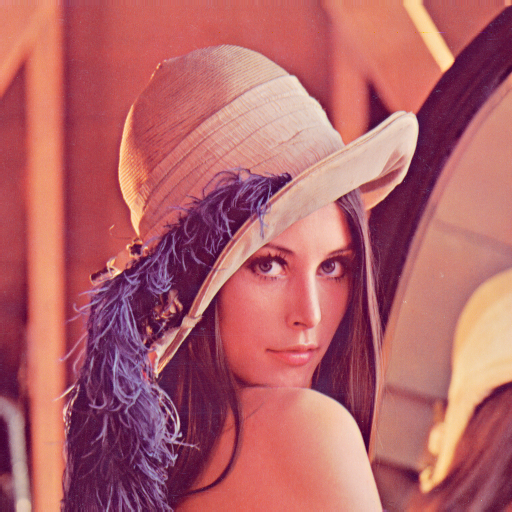

In [21]:
display(imagem) # Agora printando a imagen inline usando o IPython

In [22]:
width, height = imagem.size # O objeto imagem do PIL tem um atributo size em pixels
print(width, height)

512 512


In [23]:
imagem.filename # O objeto também tem um atributo nome (caminho) do arquivo da imagem carregada

'dados/lena.png'

In [24]:
imagem.format # Printa o formato da imagem

'PNG'

In [25]:
imagem.mode

'RGB'

In [26]:
imagem.getbands()

('R', 'G', 'B')

In [27]:
imagem.getpixel((200,250)) # Pega o valor do pixel em uma posicao da imagem

(88, 17, 60)

### (0, 0) é o canto superior esquerdo
![image.png](https://developer.mozilla.org/pt-BR/docs/Web/API/Canvas_API/Tutorial/Drawing_shapes/canvas_default_grid.png)

<PIL.Image.Image image mode=L size=512x512 at 0x7C4456AD5C10>


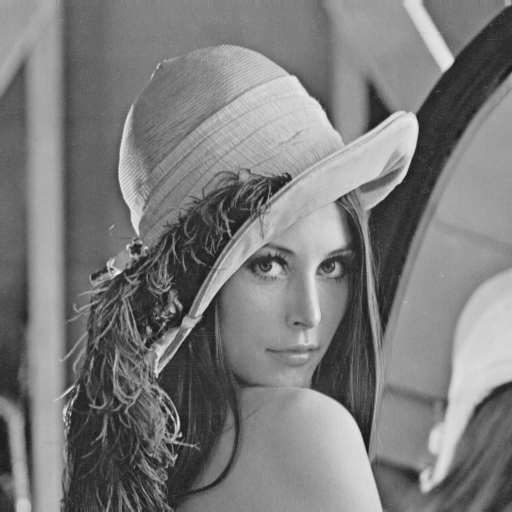

In [28]:
# Podemos converter para canal monocromatico
img_grey = imagem.convert("L")
print(img_grey)
img_grey

In [29]:
img_grey.getpixel((200, 250))

43

In [30]:
raw_imagem = imagem.tobytes() # Pegando a imagem em bytes usando o método tobytes
print(raw_imagem)

b'\xe2\x89}\xe2\x89}\xdf\x89\x85\xdf\x88\x80\xe2\x8ax\xe2\x81t\xe4\x8a{\xe3\x86|\xe3\x8c\x7f\xe1\x88w\xe4\x87~\xe1\x86y\xdf\x82l\xe2\x8bw\xdf\x87x\xdd\x81r\xdd\x86l\xdd\x83q\xde\x8ay\xde\x8br\xdf\x7fm\xdf\x84i\xe0\x81f\xdd\x86m\xda\x83n\xdd\x85q\xdf\x82l\xe1}b\xdd\x82y\xdd\x81o\xdc\x7fy\xdf\x83m\xe1\x7fg\xdf\x86m\xe2\x80j\xdf\x87z\xe1\x85p\xe3\x90|\xe5\x87h\xe7\x8e{\xe7\x8ft\xe8\x8ep\xe6\x8fu\xe9\x96y\xea\x94y\xed\x9a{\xe9\x99y\xe7\x95y\xed\x95w\xee\x95t\xea\x8fv\xeb\x9az\xea\x91t\xe8\x8ey\xe9\x87p\xe6\x85y\xe3vb\xddxi\xdb\x7f\x7f\xd5nm\xcbbg\xcaR[\xbbVb\xaeJ\\\xa9?T\xa6AU\x9e?Y\x99=`\x9b7P\x9dCb\xa6H]\xa1BR\xa6IY\xa5EW\xa9I[\xaaJZ\xaeI\\\xaeIX\xafFZ\xb4N]\xb1PX\xb2LV\xb1KX\xb1IS\xafHS\xafPY\xadP\\\xb3NY\xb1MW\xb2KY\xb1KY\xb2LV\xb6NZ\xb2NW\xb2KT\xb3NX\xb0N]\xb3OV\xb2N]\xaeNW\xadIR\xaeKT\xb3IQ\xb4KV\xb1OS\xb6OY\xb6Y\\\xb9MV\xbbQX\xbeV[\xc2Z\\\xc2VX\xbeNS\xc7Y]\xc3YZ\xc1\\X\xc3__\xc4\\U\xc0Za\xc9\\V\xcb[[\xcae^\xcea_\xc5\\Z\xc9YX\xcd^]\xcah`\xced^\xcde`\xcf`]\xd1he\xcbb_\xcc`]\xcdbh\xcad

In [31]:
%matplotlib inline
with open(r"dados/lena.png", "r") as img:
  print(img)
  plt.show(img)

<_io.TextIOWrapper name='dados/lena.png' mode='r' encoding='UTF-8'>


# Exercício: Manipulação Simples de Imagens

Carregando e Visualizando uma Imagem:
- Escolha uma imagem de sua preferência (pode ser uma imagem que você tenha no seu computador ou baixe na internet).
- Carregue a imagem usando a biblioteca PIL.
- Exiba a imagem.

Convertendo para Tons de Cinza:
- Converta a imagem que você carregou para escala de cinza usando o método convert('L').
- Exiba a imagem em tons de cinza.

Negativo da Imagem:
- Crie uma nova imagem que seja o negativo da imagem em tons de cinza (ou seja, cada valor de pixel deve ser subtraído de 255).
- Exiba o negativo da imagem.

Explorando os Dados:
- Verifique as dimensões da matriz da imagem original e da imagem em tons de cinza.
- O que você observa sobre as dimensões dessas matrizes? Explique por que elas são diferentes.

In [ ]:
# Exercicio

---------------------------
## Exemplo 3 - Entendo o que é um arquivo de áudio

Vamos carregar um arquivo de áudio usando a biblioteca Librosa.

https://librosa.org/doc/latest/index.html

In [42]:
import librosa                   # Processamento de áudio
import librosa.display           # Plot de gráficos
import matplotlib.pyplot as plt  # Plot de gráficos
import numpy as np               # Manipulação de matrizes
import IPython  # Para tocar o áudio no Jupyter

In [33]:
# Carregando o arquivo de áudio
path_dir = r"dados/"
sinal, sr = librosa.load(path_dir + "aeiou_ruido.wav", sr=44100)  # Carregando o arquivo de áudio com uma taxa de amostragem de 44100 Hz


In [34]:
# Exibindo a taxa de amostragem
print("Taxa de amostragem:", sr)

Taxa de amostragem: 44100


In [35]:
# O sinal de áudio é um array numpy de uma dimensão onde cada valor é um float de 32 bits
print("Tipo de dado do sinal:", type(sinal))
print("Primeiro valor do sinal:", sinal[0])
print("Comprimento do sinal:", len(sinal))

Tipo de dado do sinal: <class 'numpy.ndarray'>
Primeiro valor do sinal: -0.007751465
Comprimento do sinal: 206848


In [36]:
# Calculando o tempo total do áudio
tempo_total = len(sinal) / sr
print("Tempo total do áudio (em segundos):", tempo_total)

Tempo total do áudio (em segundos): 4.690430839002268


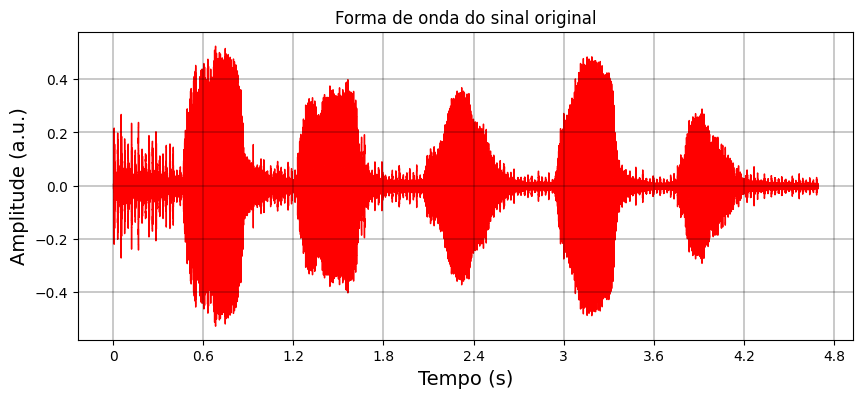

In [37]:
# Plotando a forma de onda do sinal original
plt.figure(figsize=(10, 4))
librosa.display.waveshow(sinal, sr=sr, color='r')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)
plt.title('Forma de onda do sinal original')
plt.show()

In [38]:
# Criando uma versão matematicamente alterada do sinal (elevação ao quadrado)
sinal_math = sinal ** 2

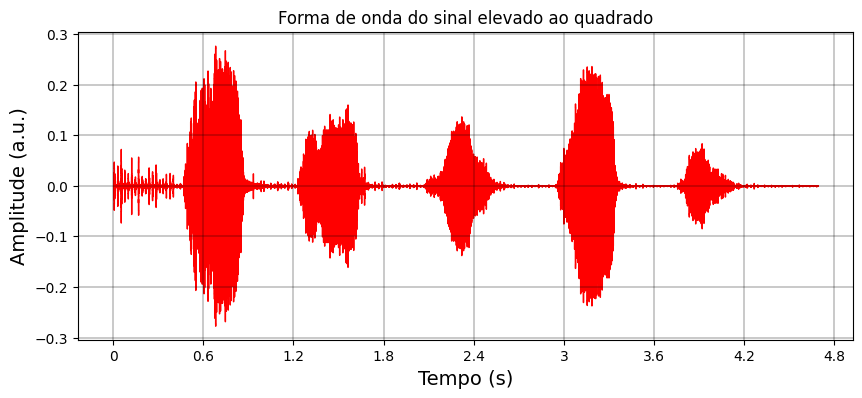

In [39]:
# Plotando a forma de onda do sinal alterado
plt.figure(figsize=(10, 4))
librosa.display.waveshow(sinal_math, sr=sr, color='r')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)
plt.title('Forma de onda do sinal elevado ao quadrado')
plt.show()

In [40]:
# Reproduzindo os áudios original e alterado
IPython.display.Audio(path_dir + 'aeiou_ruido.wav')  # Áudio original
IPython.display.Audio(data=sinal_math, rate=sr)  # Áudio alterado

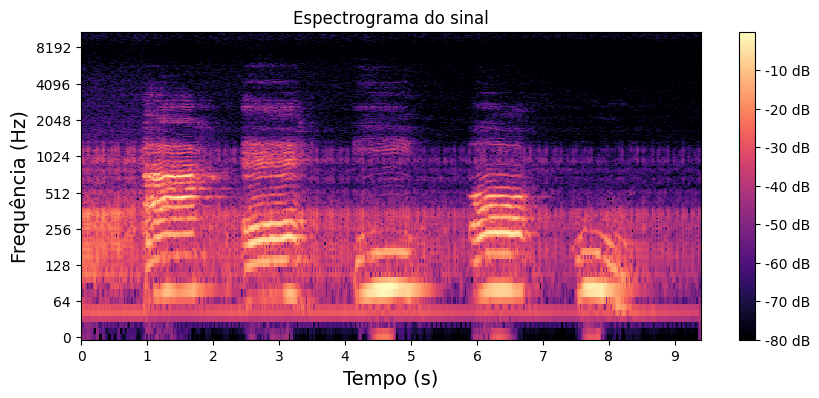

In [43]:
# Plotando o espectrograma do áudio
D = librosa.amplitude_to_db(np.abs(librosa.stft(sinal)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Frequência (Hz)', fontsize=14)
plt.title('Espectrograma do sinal')
plt.show()

In [44]:
# Eliminando o ruído do começo do áudio (considerando os primeiros 0.55 segundos)
sinal2 = sinal.copy()
for i in range(0, int(0.55 * sr)):
    sinal2[i] = 0

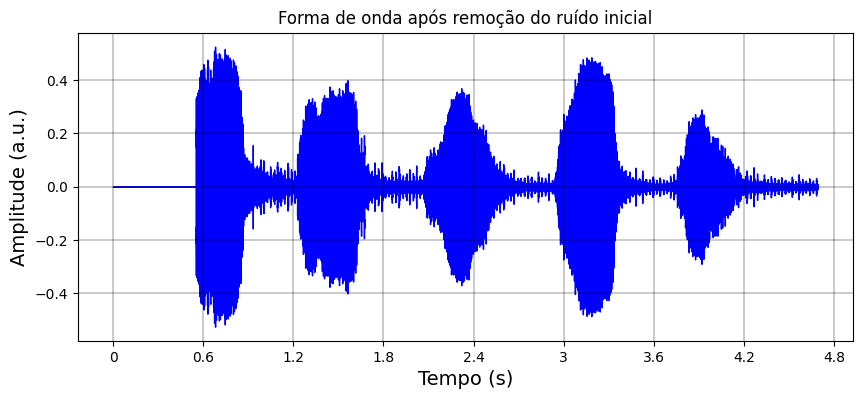

In [45]:
# Plotando a forma de onda do sinal com o ruído removido
plt.figure(figsize=(10, 4))
librosa.display.waveshow(sinal2, sr=sr, color='b')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)
plt.title('Forma de onda após remoção do ruído inicial')
plt.show()

----------------------------------
## Exemplo 4 - Representando problemas através de grafos

Grafos são objetos matemáticos muito presentes em computação. Diversas estruturas de dados são construídas e representadas através de grafos. Bases de conhecimento podem ser representadas por grafos, assim como mapas e jogos de xadrez! Algoritmos de IA específico operam sobre grafos, como o algoritmo A*.

Nesta etapa introdutória, vamos utilizar a biblioteca networkx (https://networkx.org/) que define uma classe para implementação de grafos como objetos.

Grafos são compostos por vértices (nodes) **V** e arestas (edges) **E**, sendo denotado por G(V,E).

In [46]:
import networkx as nx # Trabalhar com grafos
import matplotlib.pyplot as plt

In [47]:
# Criando um grafo simples
grafo1 = nx.Graph()  # Inicializando um objeto grafo não direcionado
print("Tipo de grafo:", type(grafo1))  # Verificando o tipo do objeto grafo

Tipo de grafo: <class 'networkx.classes.graph.Graph'>


In [48]:
# Adicionando vértices (nós) ao grafo
grafo1.add_node(1)
grafo1.add_node(2)
grafo1.add_node(3)

# Adicionando arestas (conexões) entre os vértices, formando um triângulo
grafo1.add_edge(1, 2)
grafo1.add_edge(2, 3)
grafo1.add_edge(3, 1)

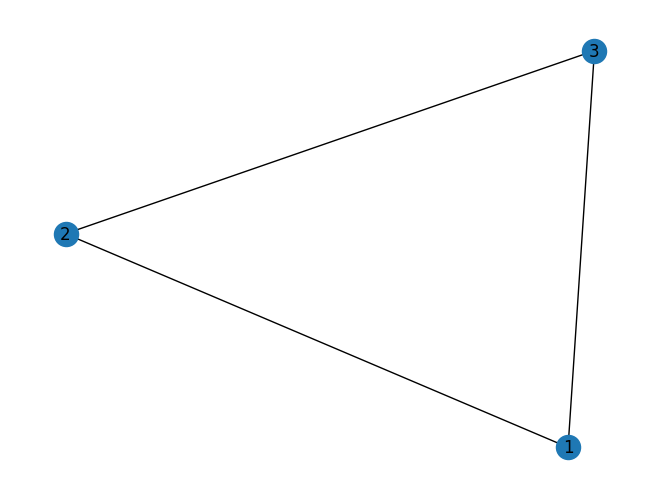

In [49]:
# Desenhando o grafo e exibindo os rótulos dos nós
nx.draw(grafo1, with_labels=True)
plt.show()  # Mostra a visualização do grafo


#### Agora criando uma representação de árvore

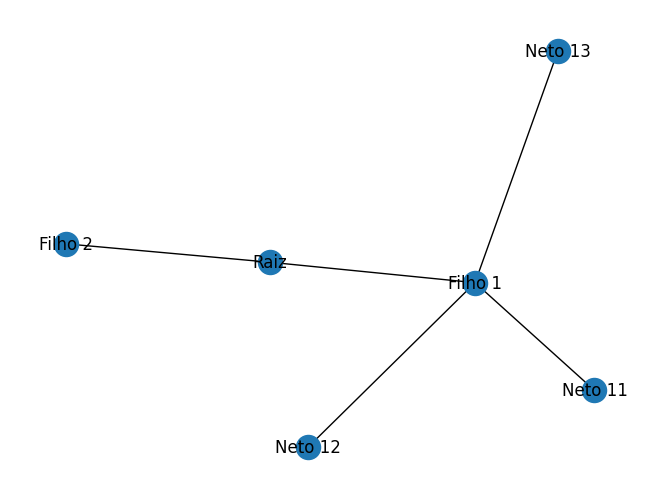

In [50]:
# Criando uma representação de árvore utilizando um grafo direcionado
G = nx.DiGraph()  # Inicializando um grafo direcionado

# Adicionando nós ao grafo para representar uma estrutura hierárquica de árvore
G.add_node("Raiz")
G.add_node("Filho 1")
G.add_node("Filho 2")
G.add_node("Neto 11")
G.add_node("Neto 12")
G.add_node("Neto 13")

# Adicionando arestas que representam as relações entre os nós (de pai para filho)
G.add_edge("Raiz", "Filho 1")
G.add_edge("Raiz", "Filho 2")
G.add_edge("Filho 1", "Neto 11")
G.add_edge("Filho 1", "Neto 12")
G.add_edge("Filho 1", "Neto 13")

nx.draw(G, with_labels=True, arrows=False)
plt.show()  # Mostra a visualização do grafo

Quantos pais e quantos filhos temos nos dados representados no grafo?

In [51]:
# Quantificando o número de pais e filhos no grafo
n_pais = 0
n_filhos = 0

# Iterando sobre cada nó do grafo para contar quantos são pais e quantos são filhos
for node in G:
    tem_filhos = nx.descendants(G, node)  # Verifica se o nó tem descendentes (filhos)
    if len(tem_filhos) > 0:  # Se o nó tem descendentes, então é um pai
        n_pais += 1  # Incrementa o contador de pais

    tem_pais = nx.ancestors(G, node)  # Verifica se o nó tem ancestrais (pais)
    if len(tem_pais) > 0:  # Se o nó tem ancestrais, então é um filho
        n_filhos += 1  # Incrementa o contador de filhos

In [52]:
# Exibindo o número de pais e filhos identificados no grafo
print("Número de pais:", n_pais)
print("Número de filhos:", n_filhos)

Número de pais: 2
Número de filhos: 5


Exercício: Representação de uma Rede Social Simples

Objetivo:
Neste exercício, você criará e manipulará um grafo que representa uma rede social simples. Os nós do grafo serão pessoas, e as arestas entre os nós representarão amizades. Ao final, você deverá responder a algumas perguntas sobre a estrutura da rede social criada.

Instruções:

1. Criação do Grafo:
- Importe a biblioteca networkx e crie um grafo não direcionado (nx.Graph()).
- Adicione ao grafo os seguintes nós, que representam as pessoas: Alice, Bob, Carol, Dave, Eve, Frank.
- Adicione as seguintes arestas, que representam as amizades:
    - Alice e Bob
    - Alice e Carol
    - Bob e Dave
    - Carol e Eve
    - Dave e Frank
    - Eve e Frank

2. Visualização do Grafo:
- Desenhe o grafo usando nx.draw() com os rótulos dos nós exibidos.
- Mostre a visualização do grafo.

Perguntas para Responder:
- Quantos amigos tem cada pessoa? (Dica: use grafo.degree() para obter o grau de cada nó).
- Qual pessoa tem o maior número de amigos?
- Qual pessoa está mais conectada, em termos de menor distância média até as outras pessoas? (Dica: use nx.shortest_path_length() para calcular as distâncias).
- Existe um caminho que conecta todas as pessoas no grafo? (Dica: verifique se o grafo é conectado usando nx.is_connected()).

Extra (Desafio):
- Adicione uma nova pessoa chamada "Grace" ao grafo e conecte-a a "Alice" e "Frank".
- Desenhe o grafo novamente e responda: Como isso afeta as respostas das perguntas anteriores?

---------------------
# Exemplo 5 - Dicionários e JSON: Tipos de Dados Semi-Estruturados

No Python, um dicionário é uma estrutura de dados que armazena pares de chave-valor, onde cada chave é única e mapeada para um valor correspondente. Essa estrutura permite acesso rápido e eficiente aos dados, utilizando a chave como índice.
Características de um Dicionário:

    Chave (Key): Um identificador único para cada valor dentro do dicionário.
    Valor (Value): O dado associado à chave, que pode ser de qualquer tipo, incluindo inteiros, listas, strings, ou mesmo outros dicionários.

In [53]:
# Exemplo de criação de um dicionário:
meu_dicionario= {
    'chave1': 1234,       # Armazenando um inteiro
    'chave2': [1,2,3,4],  # Armazenando uma lista de inteiros
    'chave3': 'Oi mundo', # Armazenando uma string
    'chave4': 1.234,      # Armazenando um float
    '1': 'vamos ver se vai dar erro'
}

# Operações comuns em Dicionários

In [54]:
meu_dicionario['chave3']  # Retorna 'Oi mundo'
# Acesso a valores: Você pode acessar os valores armazenados utilizando suas respectivas chaves.

'Oi mundo'

In [55]:
# Verificação de chaves: Pode-se verificar as chaves disponíveis no dicionário.
meu_dicionario.keys()  # Retorna todas as chaves do dicionário


dict_keys(['chave1', 'chave2', 'chave3', 'chave4', '1'])

In [56]:
# Iteração: Você pode percorrer o dicionário para acessar cada par chave-valor.
for chave in meu_dicionario.keys():
    print(meu_dicionario[chave])


1234
[1, 2, 3, 4]
Oi mundo
1.234
vamos ver se vai dar erro


## Estruturas Aninhadas:

Dicionários podem conter outros dicionários como valores, o que permite a criação de estruturas de dados complexas:

In [ ]:
zoologico = {
    'jaula1':{'animal':'macaco', 'quantidade':2, 'tamanho':10},
    'jaula2':{'animal':'girafa', 'quantidade':3, 'tamanho':50},
    'banheiro1':{}
}

## JSON: Serialização de Dados Semi-Estruturados

Os dicionários em Python podem ser facilmente convertidos para o formato JSON, que é amplamente utilizado para representar dados semi-estruturados, especialmente em APIs e sistemas web. JSON (JavaScript Object Notation) é uma maneira padronizada de representar dados estruturados como texto.
Serializando um dicionário para JSON:

Para salvar um dicionário como um arquivo JSON, que preserva sua estrutura, usamos a biblioteca json:

In [57]:
import json
with open('dict_data.json', 'w') as f:
    json.dump(meu_dicionario, f)  # Serializando e salvando o dicionário em um arquivo JSON


### Carregando um JSON de volta para um dicionário:

Ao abrir um arquivo JSON, ele pode ser carregado novamente em um dicionário Python, permitindo que os dados sejam manipulados de forma similar ao que foi feito antes da serialização

In [58]:
with open('dict_data.json', 'r') as file:
    meu_dicionario_carregado = json.load(file)  # Carregando o JSON como um dicionário


### Vantagens do JSON:

* Interoperabilidade: JSON é amplamente suportado em várias linguagens de programação, facilitando a troca de dados entre diferentes sistemas.
* Leveza: O formato JSON é leve e de fácil leitura, tanto para humanos quanto para máquinas.
* Estrutura Flexível: Embora seja uma estrutura semi-estruturada, JSON permite representar dados complexos de maneira organizada.

# Exercício: Gerenciando Dados de Alunos com Dicionários e JSON

Objetivo:
Neste exercício, você irá criar e manipular um dicionário para armazenar informações de alunos, e em seguida, irá salvar esses dados em um arquivo JSON. Posteriormente, você carregará esses dados do JSON para realizar algumas operações básicas.

Instruções:

1. Criação do Dicionário:
- Crie um dicionário chamado alunos que armazenará informações sobre três alunos. Cada aluno terá as seguintes informações:
    - nome: String representando o nome do aluno.
    - idade: Inteiro representando a idade do aluno.
    - curso: String representando o curso que o aluno está matriculado.
    - notas: Lista de inteiros representando as notas do aluno em diferentes disciplinas.

2. Salvando o Dicionário em um Arquivo JSON:

- Utilize a biblioteca json para salvar o dicionário alunos em um arquivo chamado alunos.json.
- Certifique-se de que o arquivo seja criado corretamente e que os dados sejam serializados de maneira adequada.

3. Carregando os Dados do JSON:

- Agora, carregue os dados de volta do arquivo alunos.json para um dicionário Python chamado alunos_carregado.

4. Operações com o Dicionário:

- Exiba as notas de um aluno específico: Peça ao usuário para inserir o ID do aluno (ex: '001'), e então exiba as notas desse aluno.
- Calcule e exiba a média das notas de um aluno específico: Calcule a média das notas do aluno e exiba o resultado.
- Adicione um novo aluno ao dicionário: Permita que o usuário adicione um novo aluno ao dicionário alunos_carregado com todos os campos necessários, e então salve novamente o dicionário atualizado em alunos.json.

----------------------------------
## Exemplo 6 - Tabelas

Normalmente tabelas estão em arquivos de texto do tipo .csv ou em arquivos Microsoft Excel .xlsx.

Podemos carregar a tabela na mão quando é um csv, bastando saber o separador usado. Mas para carregar xlsx e outros formatos de tabelas, vamos precisar de uma biblioteca.

A melhor biblioteca para se trabalhar com Tabelas em Python é o Pandas. Vejamos:

In [60]:
import pandas as pd

In [61]:
dados = pd.read_csv('dados/gaf_esp.csv', sep=';') # Estamos carregando o arquivo csv usando o ; como separador

Os dados carregados no pandas estão em uma estrutura de dados chamada DataFrame. Este é o objeto que o pandas cria para representar os dados da tabela. Como todo objeto em POO (programação orientada à objeto), ele possui métodos que podem ser chamados.

Para chamar um método de um objeto, basta escrever o nome da variável do objeto e colocar um . (ponto) na frente, evocando na sequência o nome do método seguido de  parenteses (arg), onde os argumentos arg podem ou não ser passados, dependendo do método.

Vejamos dois exemplos de head():

In [62]:
dados.head() # o número passado para o método head é o número de linhas que queremos ver (por default 5)

Espécie  Comprimento do Abdômen  Comprimento das Antenas
0  Gafanhoto                    0.50                      7.0
1  Gafanhoto                    0.50                      6.0
2  Gafanhoto                    0.60                      5.5
3  Gafanhoto                    0.65                      4.5
4  Gafanhoto                    0.54                      3.2

No pandas podemos acessar as colunas através do nome, de forma parecida com um dicionário:

In [63]:
dados['Espécie']

0     Gafanhoto
1     Gafanhoto
2     Gafanhoto
3     Gafanhoto
4     Gafanhoto
        ...    
95    Esperança
96    Esperança
97    Esperança
98    Esperança
99    Esperança
Name: Espécie, Length: 100, dtype: object

Vejamos quais são os tipos da estruturas de dados de uma **Tabela Pandas** e de uma **Coluna Pandas**:

In [64]:
type(dados) # As tabelas dos pandas são objetos chamados de dataframes

pandas.core.frame.DataFrame

In [65]:
type(dados['Espécie']) # Já as colunas são objetos chamados de séries

pandas.core.series.Series

Para transformar uma série em uma lista nativa do Python, podemos fazer:

In [66]:
list(dados['Espécie'])

['Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Espe

Agora vamos usar isso para contar quantos exemplos (entradas) temos de cada espécie:

In [67]:
list(dados['Espécie']).count('Gafanhoto')

50

In [68]:
list(dados['Espécie']).count('Esperança')

50

O método **.info()** do pandas nos diz quais são os tipos de dados que temos em cada coluna, a quantidade de linhas não nulas e quanto espaço na memória do computador (RAM) nosso dataframe está ocupando:

In [69]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Espécie                  100 non-null    object 
 1   Comprimento do Abdômen   100 non-null    float64
 2   Comprimento das Antenas  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


O método **.describe()** do pandas nos gera estatísticas básicas de todas as colunas do dataframe:

In [70]:
dados.describe()

Comprimento do Abdômen  Comprimento das Antenas
count              100.000000               100.000000
mean                 4.936200                 5.382400
std                  3.343806                 2.296001
min                  0.500000                 0.890000
25%                  1.692500                 3.775000
50%                  4.500000                 5.500000
75%                  8.200000                 7.000000
max                 10.000000                 9.700000

Pandas e Dataframes são muito úteis para se fazer Ciência de Dados e Machine Learning. Iremos retormar esse exemplo nas próximas aulas quando aprendermos nossos primeiros algoritmos de ML.